# PART A) Regression: Using the data in previous assignment:
------------------
Dataset: auto-mpg.csv (canvas)

Data subset: The weight and displacement attributes are isolated for simple linear regression analysis and the weight, displacement, horsepower, acceleration, and cylinders attributes are isolated for multiple regression.

Domain: This dataset revolves around the statistics on cars used in the American Statistical Association Exposition in 1983.


-------------------

##  import all necessary libraries

In [0]:
import os
import pandas as pd
import numpy as np
from sklearn import linear_model
from scipy.stats import zscore
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

## Useful Functions:

In [0]:
#Function to normalize columns
def normalize_numeric_minmax(df, name):
        df[name] = ((df[name] - df[name].min()) / (df[name].max() - df[name].min())).astype(np.float32)
    

In [0]:
# Convert a Pandas dataframe to the x,y inputs that TensorFlow needs
import collections
def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, collections.Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)

In [0]:
# Regression chart.
def chart_regression(pred,y,sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'],inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.xlabel('Input attributes')
    plt.ylabel('Displacement')
    plt.legend()
    plt.show()


## Load dataset

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/JessieVela/data/master/auto-mpg.csv',na_values=['NA','?'])

## Data Preprocessing

###  Check for null/missing values

In [0]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

### Drop null/missing values

In [0]:
df = df.dropna()
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
origin          0
name            0
dtype: int64

In [0]:
# To display the whole data frame for visual analysis
pd.set_option('display.max_rows', 500)
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


### Check for duplicate data (there is none!)

In [0]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


## Simple Linear Regression

### Only keep the input and output attributes for the simple linear regression data

In [0]:

sim_lin_regr_data = df[['weight','displacement']].copy()
sim_lin_regr_data.head()

,weight,displacement
0,3504,307.0
1,3693,350.0
2,3436,318.0
3,3433,304.0
4,3449,302.0


In [0]:
sim_lin_regr_data.head()

,weight,displacement
0,3504,307.0
1,3693,350.0
2,3436,318.0
3,3433,304.0
4,3449,302.0


### Normalize the input column

In [0]:
normalize_numeric_minmax(sim_lin_regr_data,"weight")

### Create training and testing data

In [0]:
# to xy to convert pandas to tensor flow
x,y = to_xy(sim_lin_regr_data, "displacement")

C:\Users\appsn\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  # Remove the CWD from sys.path while we load stuff.


## Split into training and test sets for simple linear regression

In [0]:
# Split into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42) 

In [0]:
x_train.shape

(313, 1)

In [0]:
#x_train

In [0]:
y_train.shape

(313,)

In [0]:
x_test.shape

(79, 1)

In [0]:
#x_test

In [0]:
y_test.shape

(79,)

In [0]:
# Create linear regression object
sim_lin_regr = linear_model.LinearRegression()

# Fit the linear regression model to the training set
sim_lin_regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
# Apply the model to the test set
y_pred_test = sim_lin_regr.predict(x_test)

In [0]:
# Compare true vs predicted values
for i in range(10):
    print("True displacement : ",y_test[i],"Prediction : ", y_pred_test[i])

True displacement :  96.0 Prediction :  104.32489
True displacement :  121.0 Prediction :  173.65253
True displacement :  91.0 Prediction :  59.82249
True displacement :  91.0 Prediction :  77.55481
True displacement :  140.0 Prediction :  173.08052
True displacement :  97.0 Prediction :  100.43522
True displacement :  400.0 Prediction :  396.85095
True displacement :  97.0 Prediction :  113.01944
True displacement :  225.0 Prediction :  227.30708
True displacement :  68.0 Prediction :  67.48743


Root mean squared error = 32.6509
R-squared = 0.9085


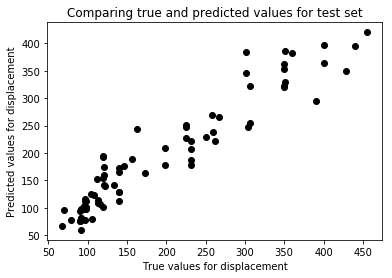

In [0]:
# Comparing true versus predicted values
plt.scatter(y_test, y_pred_test, color='black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for displacement')
plt.ylabel('Predicted values for displacement')

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred_test)))
print('R-squared = %.4f' % r2_score(y_test, y_pred_test))

Slope =  403.49603
Intercept =  38.429306


Text(0, 0.5, 'Displacement')

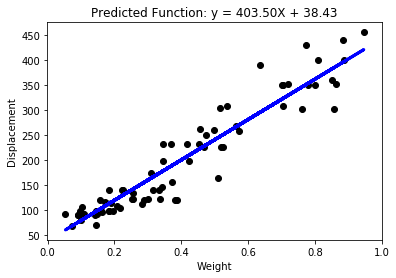

In [0]:
# Display model parameters
print('Slope = ', sim_lin_regr.coef_[0])
print('Intercept = ', sim_lin_regr.intercept_)

# Plot outputs
plt.scatter(x_test, y_test,  color='black')
plt.plot(x_test, y_pred_test, color='blue', linewidth=3)
titlestr = 'Predicted Function: y = %.2fX + %.2f' % (sim_lin_regr.coef_[0], sim_lin_regr.intercept_)
plt.title(titlestr)
plt.xlabel('Weight')
plt.ylabel('Displacement')

## Multiple Linear Regression

In [0]:
# Only keep the input and output attributes needed for the multiple linear regression data
mult_lin_regr_data = df[['cylinders','displacement','horsepower','acceleration', 'weight']].copy()
mult_lin_regr_data.head()

,cylinders,displacement,horsepower,acceleration,weight
0,8,307.0,130.0,12.0,3504
1,8,350.0,165.0,11.5,3693
2,8,318.0,150.0,11.0,3436
3,8,304.0,150.0,12.0,3433
4,8,302.0,140.0,10.5,3449


In [0]:
# Normalize the input columns
normalize_numeric_minmax(mult_lin_regr_data,"cylinders")
normalize_numeric_minmax(mult_lin_regr_data,"horsepower")
normalize_numeric_minmax(mult_lin_regr_data,"acceleration")
normalize_numeric_minmax(mult_lin_regr_data,"weight")
mult_lin_regr_data.head()

,cylinders,displacement,horsepower,acceleration,weight
0,1.0,307.0,0.456522,0.238095,0.536150
1,1.0,350.0,0.646739,0.208333,0.589736
2,1.0,318.0,0.565217,0.178571,0.516870
3,1.0,304.0,0.565217,0.238095,0.516019
4,1.0,302.0,0.510870,0.148810,0.520556


In [0]:
# to xy to convert pandas to tensor flow
x2, y2 = to_xy(mult_lin_regr_data, "displacement")

## Split into training and test sets for multiple linear regression


In [0]:
# Split into training and test sets
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.2, random_state=42)

In [0]:
x_train2.shape

(313, 4)

In [0]:
y_train2.shape

(313,)

In [0]:
x_test2.shape

(79, 4)

In [0]:
y_test2.shape

(79,)

In [0]:
# Create linear regression object
mult_lin_regr = linear_model.LinearRegression()

# Fit regression model to the training set
mult_lin_regr.fit(x_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
# Apply model to the test set
y_pred_test2 = mult_lin_regr.predict(x_test2)

In [0]:
# Compare true vs predicted values
for i in range(10):
    print("True displacement : ",y_test2[i],"Prediction : ", y_pred_test2[i])

True displacement :  96.0 Prediction :  98.833466
True displacement :  121.0 Prediction :  145.28267
True displacement :  91.0 Prediction :  82.68596
True displacement :  91.0 Prediction :  86.67464
True displacement :  140.0 Prediction :  132.53468
True displacement :  97.0 Prediction :  102.6138
True displacement :  400.0 Prediction :  376.21164
True displacement :  97.0 Prediction :  104.01846
True displacement :  225.0 Prediction :  217.61073
True displacement :  68.0 Prediction :  75.677826


Root mean squared error = 23.7585
R-squared = 0.9515


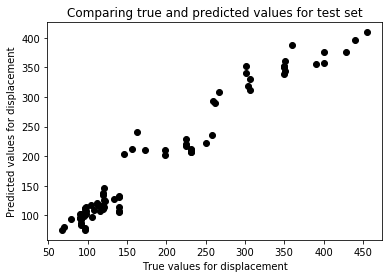

In [0]:
# Comparing true versus predicted values
plt.scatter(y_test2, y_pred_test2, color='black')
plt.title('Comparing true and predicted values for test set')
plt.xlabel('True values for displacement')
plt.ylabel('Predicted values for displacement')

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test2, y_pred_test2)))
print('R-squared = %.4f' % r2_score(y_test2, y_pred_test2))

In [0]:
# Display model parameters
print('Slope = ', mult_lin_regr.coef_)
print('Intercept = ', mult_lin_regr.intercept_)

Slope =  [159.77374   80.653854 -25.506392 132.66293 ]
Intercept =  50.313965


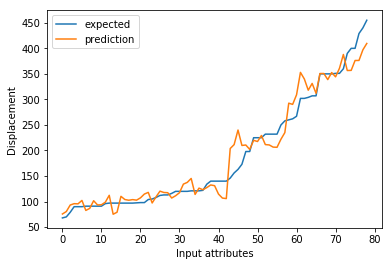

In [0]:
# Graph the regression model to see the relationship between the predicted and expected values
chart_regression(y_pred_test2,y_test2)

# PART B) Regression and Classification using a new data set provided :
----------------------------
### Admission Prediction

Dataset - This  dataset  is  inspired  by  the  UCLA  Graduate  Dataset.  
Features - 

Standardized Tests: 

a.GREscores : out of 340  

b.TOEFLscores :out of 120  

c.University rating.(1 to 5)

d.Statement of purposestrength.(1 to 5)

e.Letter of recommendation strength.(1 to 5)

f.Undergraduate GPA-out of 10  (5 to 10)Binary variable. (Categorical)

g.Research  experience -either  0  or  1,  where  0  is  no  experience  and  1  is  some experience.

Target Variable

h.Chance  of  admit –continuous  attribute  between  0  and  1  representing  the probability of admission.

# Regression


## Import Required Libraries and Read Data CSV 

In [0]:
import collections
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn import tree
import seaborn as sns
%matplotlib inline



## Function Definitions

In [0]:
#Function to normalize columns
def normalize_numeric_minmax(df, name):
    df[name] = ((df[name] - df[name].min()) / (df[name].max() - df[name].min())).astype(np.float32)

def to_xy(df, target):
    result = []
    for x in df.columns:
        if x != target:
            result.append(x)
    # find out the type of the target column. 
    target_type = df[target].dtypes
    target_type = target_type[0] if isinstance(target_type, collections.Sequence) else target_type
    # Encode to int for classification, float otherwise. TensorFlow likes 32 bits.
    if target_type in (np.int64, np.int32):
        # Classification
        dummies = pd.get_dummies(df[target])
        return df[result].values.astype(np.float32), dummies.values.astype(np.float32)
    else:
        # Regression
        return df[result].values.astype(np.float32), df[target].values.astype(np.float32)
    
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred' : pred, 'y' : y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    a = plt.plot(t['y'].tolist(),label='expected')
    b = plt.plot(t['pred'].tolist(),label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()
    

In [0]:
from google.colab import drive
drive.mount('/content/drive/')

## Load Admissions Dataset

In [0]:
# Reindex with indexes that do not have spaces
indx = ['SerialNo', 'GRE', 'TOEFL', 'U_Rate', 'SOP', 'LOR', 'CGPA', 'Research', 'Admit_Chance']

# Local relative location
df = pd.read_csv('data/Admission_Predict_Ver1.1_small_data_set_for_Linear_Regression.csv')

# csv loaded from file saved on google drive
#df = pd.read_csv('drive/My Drive/Admission_Predict_Ver1.1_small_data_set_for_Linear_Regression.csv')
df.columns = indx

df.head()

,SerialNo,GRE,TOEFL,U_Rate,SOP,LOR,CGPA,Research,Admit_Chance
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## Data Preprocessing

In [0]:
df.dtypes

SerialNo          int64
GRE               int64
TOEFL             int64
U_Rate            int64
SOP             float64
LOR             float64
CGPA            float64
Research          int64
Admit_Chance    float64
dtype: object

In [0]:
df.shape

(500, 9)

## Create Working Copy of Data and Preprocess

In [0]:
data = df.copy()

In [0]:
classify = df.copy()

## Drop Serial No. 

In [0]:
data = data.drop(['SerialNo'],axis=1)
data.dtypes

GRE               int64
TOEFL             int64
U_Rate            int64
SOP             float64
LOR             float64
CGPA            float64
Research          int64
Admit_Chance    float64
dtype: object

In [0]:
data.shape

(500, 8)

## Check for duplicates

In [0]:
print("the number of duplicates is %d" % (data.duplicated().sum()) )

the number of duplicates is 0


## Remove Outliers

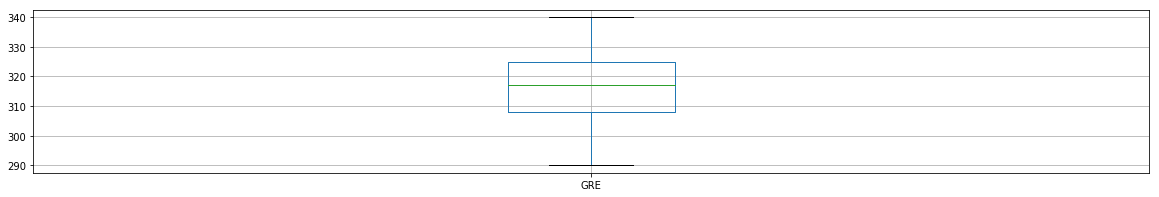

In [0]:
%matplotlib inline
data[["GRE"]].boxplot(figsize=(20,3))

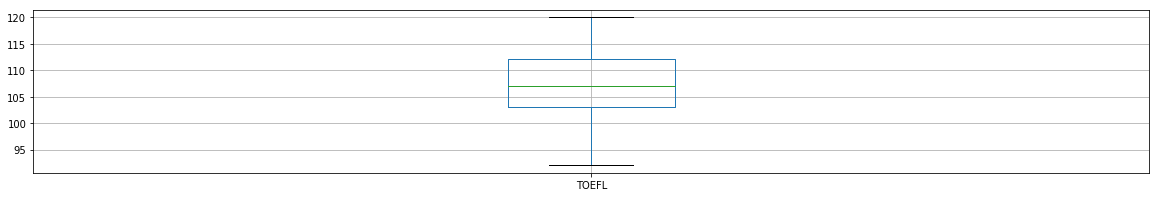

In [0]:
data[["TOEFL"]].boxplot(figsize=(20,3))

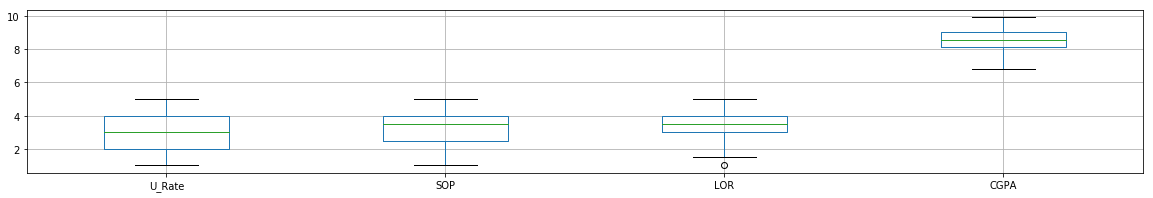

In [0]:
data[['U_Rate', 'SOP', 'LOR', 'CGPA']].boxplot(figsize=(20,3))

In [0]:
#Remove oputliers to see if improves prediction
data.min()

GRE             290.00
TOEFL            92.00
U_Rate            1.00
SOP               1.00
LOR               1.00
CGPA              6.80
Research          0.00
Admit_Chance      0.34
dtype: float64

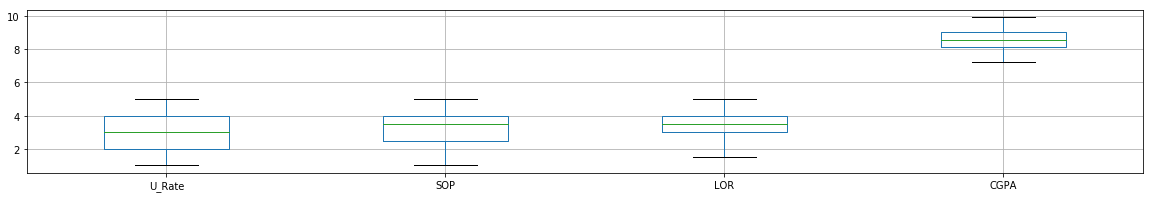

In [0]:
data = data[data["LOR"]>1.]
data = data[data["Admit_Chance"] > 0.36]
data[['U_Rate', 'SOP', 'LOR', 'CGPA']].copy().boxplot(figsize=(20,3))

In [0]:
data.min()

GRE             290.00
TOEFL            92.00
U_Rate            1.00
SOP               1.00
LOR               1.50
CGPA              7.20
Research          0.00
Admit_Chance      0.37
dtype: float64

## Create copy to normalize before preforming test and predict

In [0]:
normalData = data.copy()
for col in ['GRE', 'TOEFL', 'U_Rate', 'SOP', 'LOR', 'CGPA']:
    normalize_numeric_minmax(normalData, col)

normalData[20:26]


,GRE,TOEFL,U_Rate,SOP,LOR,CGPA,Research,Admit_Chance
20,0.44,0.535714,0.50,0.500,0.142857,0.257353,1,0.64
21,0.70,0.785714,0.75,0.500,0.142857,0.441176,0,0.70
22,0.76,0.857143,1.00,1.000,1.000000,0.845588,1,0.94
23,0.88,0.964286,1.00,1.000,0.857143,0.919118,1,0.95
24,0.92,0.964286,1.00,0.750,0.571429,0.955882,1,0.97
25,1.00,1.000000,1.00,0.875,0.857143,0.882353,1,0.94


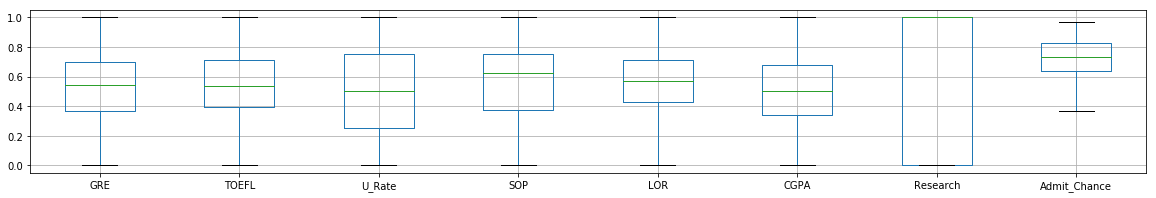

In [0]:
normalData.boxplot(figsize=(20,3))

In [0]:
normalData.min()

GRE             0.00
TOEFL           0.00
U_Rate          0.00
SOP             0.00
LOR             0.00
CGPA            0.00
Research        0.00
Admit_Chance    0.37
dtype: float64

## Regression without Normalization

In [0]:
x,y=to_xy(data,"Admit_Chance")

In [0]:
x.shape

(495, 7)

In [0]:
#Split for train and test

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [0]:
x_train.shape

(346, 7)

In [0]:
x_test.shape

(149, 7)

In [0]:
x_train.shape

(346, 7)

In [0]:
x_test.shape

(149, 7)

In [0]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Fit regression model to the training set
regr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
y_pred = regr.predict(x_test)

In [0]:
for i in range(10):
    print("True chance : ",y_test[i],"Prediction : ", y_pred[i])

True chance :  0.68 Prediction :  0.5992248
True chance :  0.74 Prediction :  0.7661655
True chance :  0.67 Prediction :  0.5900644
True chance :  0.72 Prediction :  0.6307347
True chance :  0.72 Prediction :  0.731889
True chance :  0.66 Prediction :  0.64866877
True chance :  0.61 Prediction :  0.60794234
True chance :  0.64 Prediction :  0.5981711
True chance :  0.62 Prediction :  0.60028887
True chance :  0.45 Prediction :  0.72611237


Root mean squared error = 0.0625
R-squared = 0.8047


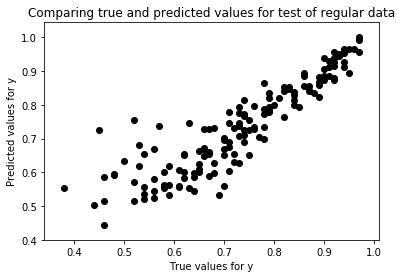

In [0]:
# Comparing true versus predicted values
plt.scatter(y_test, y_pred, color='black')
plt.title('Comparing true and predicted values for test of regular data')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(y_test, y_pred)))
print('R-squared = %.4f' % r2_score(y_test, y_pred))

In [0]:
# Display model parameters
print('Slope = ', regr.coef_)
print('Intercept = ', regr.intercept_)

Slope =  [0.00230566 0.002503   0.00103979 0.00712744 0.01719604 0.11660607
 0.01798344]
Intercept =  -1.3714046


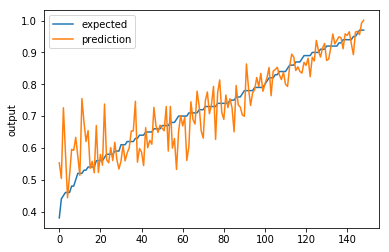

In [0]:
chart_regression(y_pred, y_test)

## Regression with Normalization

In [0]:
s,t=to_xy(normalData,"Admit_Chance")

In [0]:
s_train, s_test, t_train, t_test = train_test_split(s,t, test_size=0.3, random_state=42)

In [0]:
# Create linear regression object
regr1 = linear_model.LinearRegression()

# Fit regression model to the training set
regr1.fit(s_train, t_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
t_pred = regr1.predict(s_test)

In [0]:
for i in range(10):
    print("True chance : ",t_test[i],"Prediction : ", t_pred[i])

True chance :  0.68 Prediction :  0.5992248
True chance :  0.74 Prediction :  0.7661655
True chance :  0.67 Prediction :  0.5900643
True chance :  0.72 Prediction :  0.6307346
True chance :  0.72 Prediction :  0.73188895
True chance :  0.66 Prediction :  0.64866865
True chance :  0.61 Prediction :  0.6079422
True chance :  0.64 Prediction :  0.59817106
True chance :  0.62 Prediction :  0.60028875
True chance :  0.45 Prediction :  0.7261122


Root mean squared error = 0.0625
R-squared = 0.8047


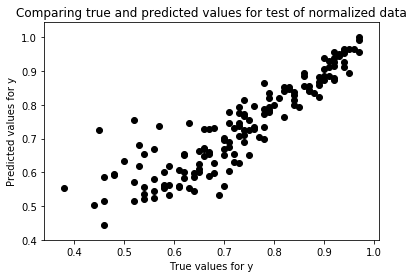

In [0]:
# Comparing true versus predicted values
plt.scatter(t_test, t_pred, color='black')
plt.title('Comparing true and predicted values for test of normalized data')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(t_test, t_pred)))
print('R-squared = %.4f' % r2_score(t_test, t_pred))

In [0]:
# Display model parameters
print('Slope = ', regr1.coef_)
print('Intercept = ', regr1.intercept_)

Slope =  [0.11528293 0.07008408 0.00415916 0.02850981 0.06018623 0.31716847
 0.01798347]
Intercept =  0.40103662


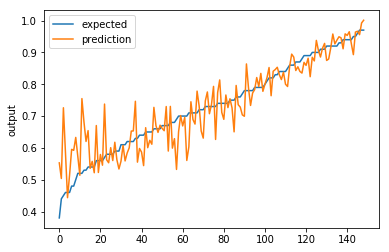

In [0]:
chart_regression(t_pred, t_test)

## Feature Selection
## Coorelation using Heatmap

In [0]:
def heatMap(df):
    #Create Correlation df
    corr = df.corr()
    #Plot figsize
    fig, ax = plt.subplots(figsize=(10, 10))
    #Generate Color Map
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
    plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
    plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
    plt.show()

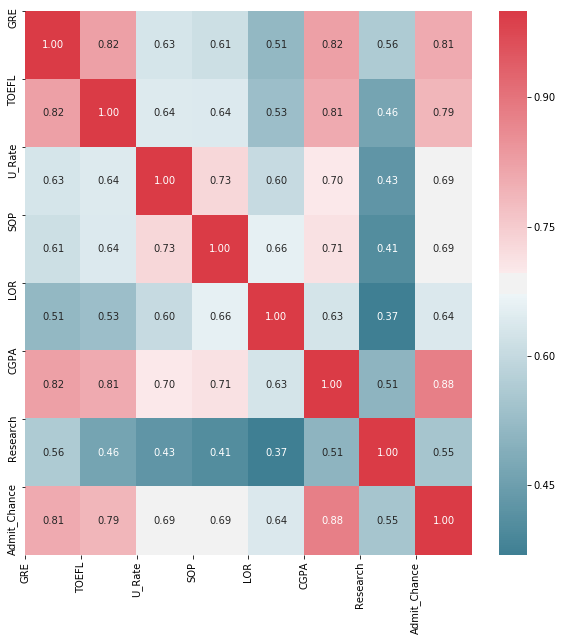

In [0]:
heatMap(data)

## Regression with CGPA and Admit_Chance Only
------------
CGPA is highly coorelated with Admit Chance 

-----------


In [0]:
data.head()

,GRE,TOEFL,U_Rate,SOP,LOR,CGPA,Research,Admit_Chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [0]:
twoCols = data.copy().drop(['GRE', 'TOEFL', 'U_Rate', 'SOP', 'LOR', 'Research'], axis=1)

In [0]:
twoCols.head()

,CGPA,Admit_Chance
0,9.65,0.92
1,8.87,0.76
2,8.00,0.72
3,8.67,0.80
4,8.21,0.65


In [0]:
a, b = to_xy(twoCols, "Admit_Chance")

In [0]:
a_train, a_test, b_train, b_test = train_test_split(a,b, test_size=0.3, random_state=42)

In [0]:
# Create linear regression object
regr2 = linear_model.LinearRegression()

# Fit regression model to the training set
regr2.fit(a_train, b_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
b_pred = regr2.predict(a_test)

In [0]:
for i in range(10):
    print("True chance : ",b_test[i],"Prediction : ", b_pred[i])

True chance :  0.68 Prediction :  0.6319283
True chance :  0.74 Prediction :  0.7904242
True chance :  0.67 Prediction :  0.6134027
True chance :  0.72 Prediction :  0.6298698
True chance :  0.72 Prediction :  0.767782
True chance :  0.66 Prediction :  0.60928607
True chance :  0.61 Prediction :  0.6339867
True chance :  0.64 Prediction :  0.54341745
True chance :  0.62 Prediction :  0.64222026
True chance :  0.45 Prediction :  0.7286726


Root mean squared error = 0.0688
R-squared = 0.7636


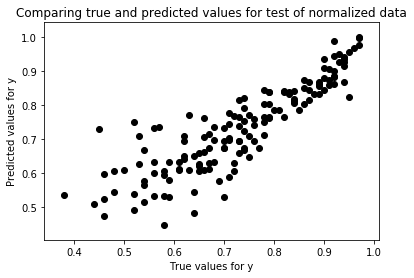

In [0]:
# Comparing true versus predicted values
plt.scatter(b_test, b_pred, color='black')
plt.title('Comparing true and predicted values for test of normalized data')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(b_test, b_pred)))
print('R-squared = %.4f' % r2_score(b_test, b_pred))

In [0]:
# Display model parameters
print('Slope = ', regr2.coef_)
print('Intercept = ', regr2.intercept_)

Slope =  [0.20583901]
Intercept =  -1.0415429


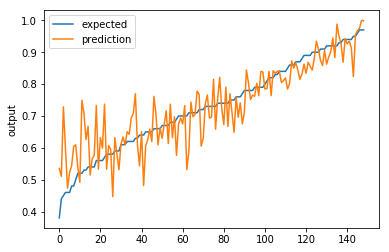

In [0]:
chart_regression(b_pred, b_test)

## Regression using TOP 3 features 

In [0]:
data.head()

,GRE,TOEFL,U_Rate,SOP,LOR,CGPA,Research,Admit_Chance
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [0]:
Cols = data.copy().drop(['U_Rate', 'SOP', 'LOR', 'Research'], axis=1)

In [0]:
Cols.head()

,GRE,TOEFL,CGPA,Admit_Chance
0,337,118,9.65,0.92
1,324,107,8.87,0.76
2,316,104,8.00,0.72
3,322,110,8.67,0.80
4,314,103,8.21,0.65


In [0]:
m, n = to_xy(Cols, "Admit_Chance")

In [0]:
m_train, m_test, n_train, n_test = train_test_split(m,n, test_size=0.3, random_state=42)

In [0]:
# Create linear regression object
regr2 = linear_model.LinearRegression()

# Fit regression model to the training set
regr2.fit(m_train, n_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [0]:
n_pred = regr2.predict(m_test)

In [0]:
for i in range(10):
    print("True chance : ",n_test[i],"Prediction : ", n_pred[i])

True chance :  0.68 Prediction :  0.60535216
True chance :  0.74 Prediction :  0.7608762
True chance :  0.67 Prediction :  0.58668685
True chance :  0.72 Prediction :  0.6408589
True chance :  0.72 Prediction :  0.76873016
True chance :  0.66 Prediction :  0.61202
True chance :  0.61 Prediction :  0.6306019
True chance :  0.64 Prediction :  0.5935674
True chance :  0.62 Prediction :  0.6226511
True chance :  0.45 Prediction :  0.7456193


Root mean squared error = 0.0655
R-squared = 0.7854


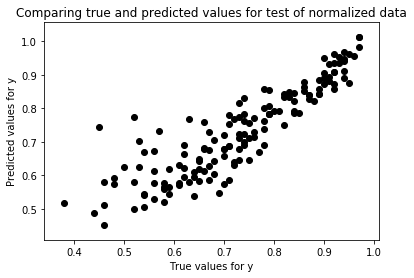

In [0]:
# Comparing true versus predicted values
plt.scatter(n_test, n_pred, color='black')
plt.title('Comparing true and predicted values for test of normalized data')
plt.xlabel('True values for y')
plt.ylabel('Predicted values for y')

# Model evaluation
print("Root mean squared error = %.4f" % np.sqrt(mean_squared_error(n_test, n_pred)))
print('R-squared = %.4f' % r2_score(n_test, n_pred))

In [0]:
# Display model parameters
print('Slope = ', regr2.coef_)
print('Intercept = ', regr2.intercept_)

Slope =  [0.00251266 0.00280918 0.14496449]
Intercept =  -1.6160579


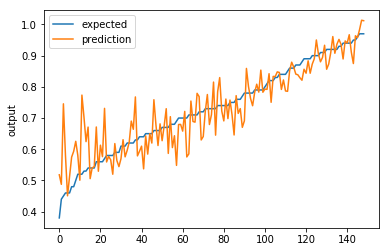

In [0]:
chart_regression(n_pred, n_test)

# Classification

## Data Preprocessing

In [0]:
classify = data.copy()

In [0]:
classify.shape

(495, 8)

In [0]:
classify.columns

Index(['GRE', 'TOEFL', 'U_Rate', 'SOP', 'LOR', 'CGPA', 'Research',
       'Admit_Chance'],
      dtype='object')

In [0]:
classify.duplicated().sum()

0

## Data visualization for better understanding of distribution

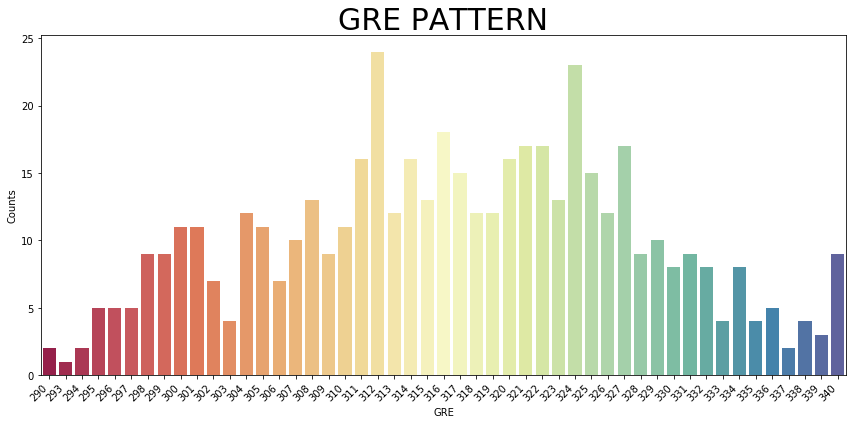

In [0]:
plt.figure(figsize=(12,6))
plt.title('GRE PATTERN',fontdict={'fontsize':'30'})
ax = sns.countplot(x='GRE',data=classify,palette='Spectral')
ax.set(xlabel='GRE', ylabel='Counts')
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()

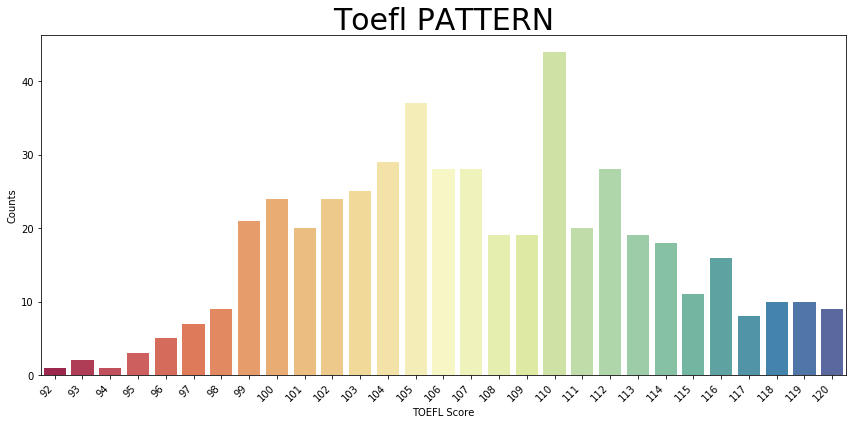

In [0]:
plt.figure(figsize=(12,6))
plt.title('Toefl PATTERN',fontdict={'fontsize':'30'})
ax = sns.countplot(x='TOEFL',data=classify,palette='Spectral')
ax.set(xlabel='TOEFL Score', ylabel='Counts')
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()

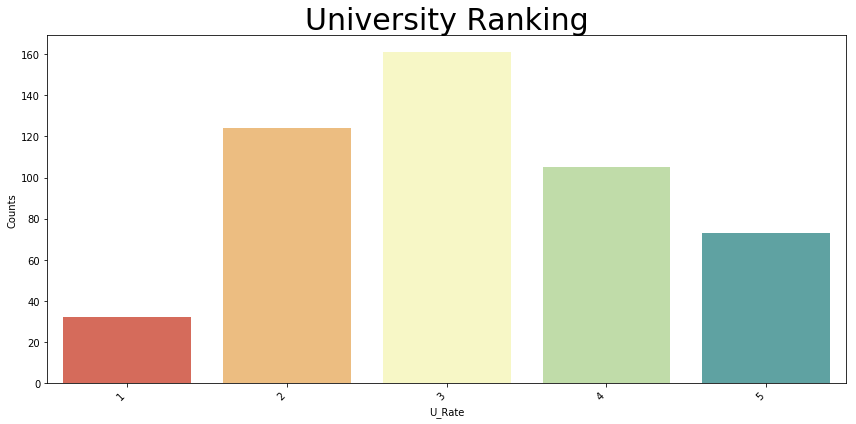

In [0]:
plt.figure(figsize=(12,6))
plt.title('University Ranking',fontdict={'fontsize':'30'})
ax = sns.countplot(x='U_Rate',data=classify,palette='Spectral')
ax.set(xlabel='U_Rate', ylabel='Counts')
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()

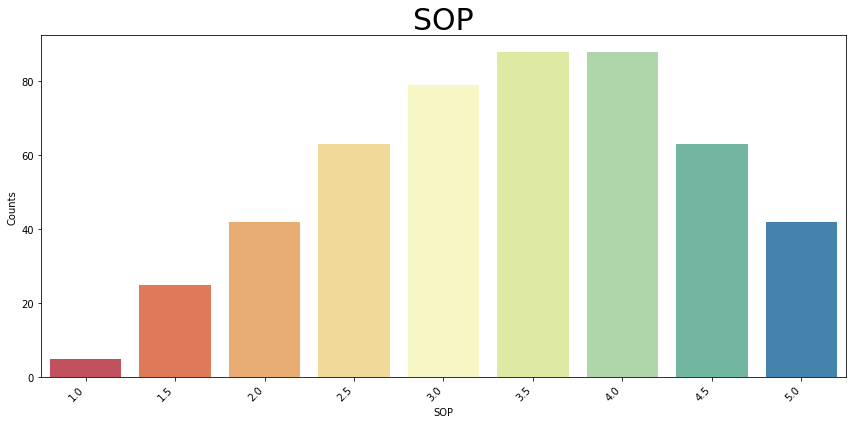

In [0]:
plt.figure(figsize=(12,6))
plt.title('SOP',fontdict={'fontsize':'30'})
ax = sns.countplot(x='SOP',data=classify,palette='Spectral')
ax.set(xlabel='SOP', ylabel='Counts')
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()

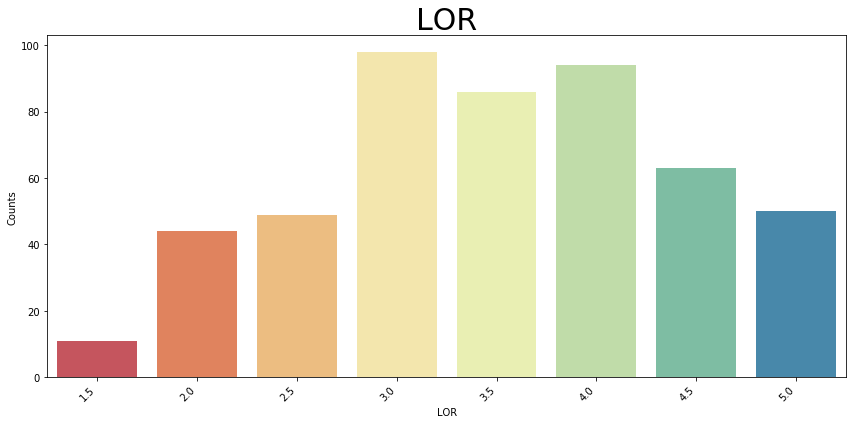

In [0]:
plt.figure(figsize=(12,6))
plt.title('LOR',fontdict={'fontsize':'30'})
ax = sns.countplot(x='LOR',data=classify,palette='Spectral')
ax.set(xlabel='LOR', ylabel='Counts')
plt.setp(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.tight_layout()
plt.show()

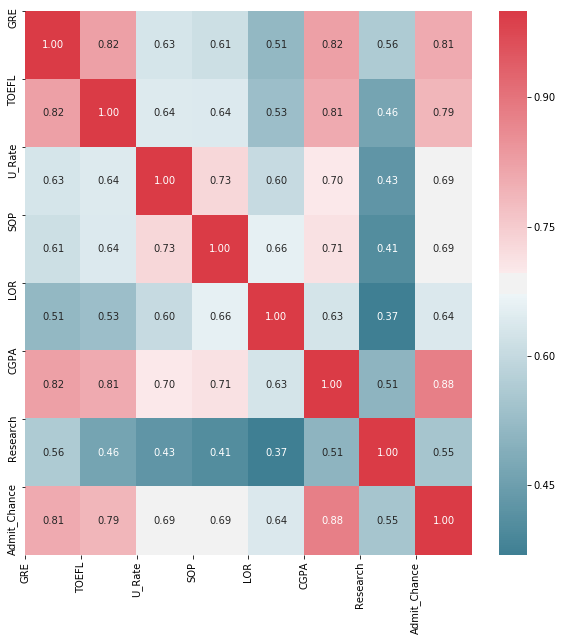

In [0]:
heatMap(classify)

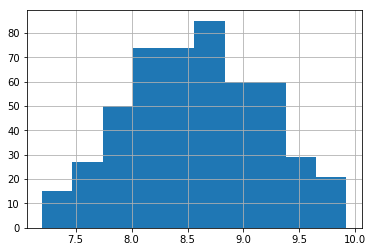

In [0]:
classify.CGPA.hist()

In [0]:
classify.dtypes

GRE               int64
TOEFL             int64
U_Rate            int64
SOP             float64
LOR             float64
CGPA            float64
Research          int64
Admit_Chance    float64
dtype: object

In [0]:
classify.min(axis = 0, skipna = True)

GRE             290.00
TOEFL            92.00
U_Rate            1.00
SOP               1.00
LOR               1.50
CGPA              7.20
Research          0.00
Admit_Chance      0.37
dtype: float64

In [0]:
classify.max(axis = 0, skipna = True)

GRE             340.00
TOEFL           120.00
U_Rate            5.00
SOP               5.00
LOR               5.00
CGPA              9.92
Research          1.00
Admit_Chance      0.97
dtype: float64

## Dicretization Chance of Admit into three classes

In [0]:
data1 = pd.cut(classify['Admit_Chance'],3)
data1.value_counts(sort=False)

(0.369, 0.57]     75
(0.57, 0.77]     234
(0.77, 0.97]     186
Name: Admit_Chance, dtype: int64

In [0]:
data2 = classify.copy()

In [0]:
def Admit(row):
    if (row['Admit_Chance'] >= 0.33 and row['Admit_Chance']<0.55):
        val = 0
    elif (row['Admit_Chance'] >= 0.55 and row['Admit_Chance']<0.76):
        val = 1
    else:
        val = 2
    return val

In [0]:
data2['Admit'] = data2.apply(Admit, axis=1)

In [0]:
data2.head()

,GRE,TOEFL,U_Rate,SOP,LOR,CGPA,Research,Admit_Chance,Admit
0,337,118,4,4.5,4.5,9.65,1,0.92,2
1,324,107,4,4.0,4.5,8.87,1,0.76,2
2,316,104,3,3.0,3.5,8.00,1,0.72,1
3,322,110,3,3.5,2.5,8.67,1,0.80,2
4,314,103,2,2.0,3.0,8.21,0,0.65,1


In [0]:
data2.tail()

,GRE,TOEFL,U_Rate,SOP,LOR,CGPA,Research,Admit_Chance,Admit
495,332,108,5,4.5,4.0,9.02,1,0.87,2
496,337,117,5,5.0,5.0,9.87,1,0.96,2
497,330,120,5,4.5,5.0,9.56,1,0.93,2
498,312,103,4,4.0,5.0,8.43,0,0.73,1
499,327,113,4,4.5,4.5,9.04,0,0.84,2


## Create train and test data

In [0]:
data2.columns

Index(['GRE', 'TOEFL', 'U_Rate', 'SOP', 'LOR', 'CGPA', 'Research',
       'Admit_Chance', 'Admit'],
      dtype='object')

In [0]:
data2 = data2.drop('Admit_Chance',axis=1)

In [0]:
df_input = data2[['GRE', 'TOEFL', 'U_Rate', 'SOP', 'LOR', 'CGPA', 'Research']]

In [0]:
df_output = data2['Admit']

In [0]:
df_input.shape

(495, 7)

In [0]:
df_output.shape

(495,)

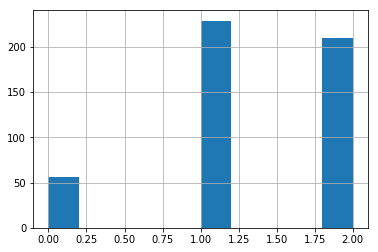

In [0]:
data2['Admit'].hist()

In [0]:
x,y = to_xy(data2,"Admit")
# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [0]:
x_train.shape

(396, 7)

In [0]:
y_test.shape

(99, 3)

## Decision Tree Classifier

In [0]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)
clf = clf.fit(x_train, y_train)

In [0]:
pred = clf.predict(x_test)

In [0]:
print('Evaluating with F1 score metric: %.2f' % f1_score(y_test, pred,average='micro'))

Evaluating with F1 score metric: 0.74


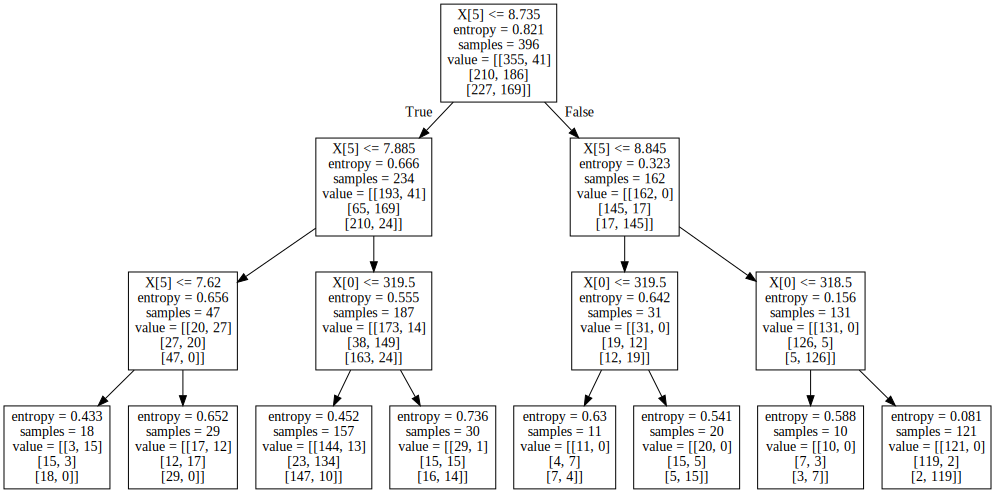

In [0]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None) 
graphviz.Source(dot_data) 

In [0]:
# Create copy to perform classification methods to
to_classify = data.copy()

In [0]:
# Sort by classification column
to_classify.sort_values(by=['Admit_Chance'], inplace=True)

In [0]:

# Create ordinal values based on classification column percentages
to_classify["Class"] = 0


In [0]:
to_classify.loc[(to_classify.Admit_Chance > 0.67), 'Class'] = 1
to_classify.loc[(to_classify.Admit_Chance > 0.79), 'Class'] = 2


In [0]:
# drop classification column
to_classify = to_classify.drop(["Admit_Chance"], axis=1)
to_classify[to_classify["Class"] == 0].count()

GRE         173
TOEFL       173
U_Rate      173
SOP         173
LOR         173
CGPA        173
Research    173
Class       173
dtype: int64

In [0]:
to_classify.shape

(495, 8)

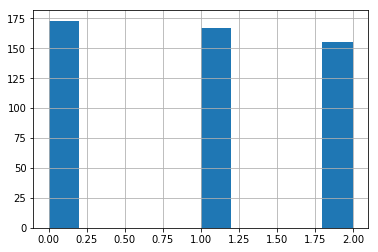

In [0]:
to_classify['Class'].hist()

## Desicion tree classifier on balanced dataset

In [0]:
def toSingleCol(awry, names):
    to_rtrn = []
    for i in range(0, len(awry)):
        found = False
        j = 0
        while(not found and j < len(awry[i])):
            found = awry[i][j] == 1
            if(not found):
                j += 1   
        to_rtrn.append(names[j])
    return to_rtrn
        

x2,y2 = to_xy(to_classify,"Class")

# Split into train/test
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, test_size=0.20, random_state=42)
clf = tree.DecisionTreeClassifier(criterion='entropy',max_depth=3)

X = pd.DataFrame(x_train2, columns=['GRE', 'TOEFL', 'U_Rate', 'SOP', 'LOR', 'CGPA', 'Research'])
Y = toSingleCol(y_train2, ['Unlikely', 'Probable', 'Likely'])
to_f1 = toSingleCol(y_test2, ['Unlikely', 'Probable', 'Likely'])

clf = clf.fit(X, Y)
pred = clf.predict(x_test2)

print('Evaluating with F1 score metric: %.2f' % f1_score(to_f1, pred,average='micro'))

Evaluating with F1 score metric: 0.82


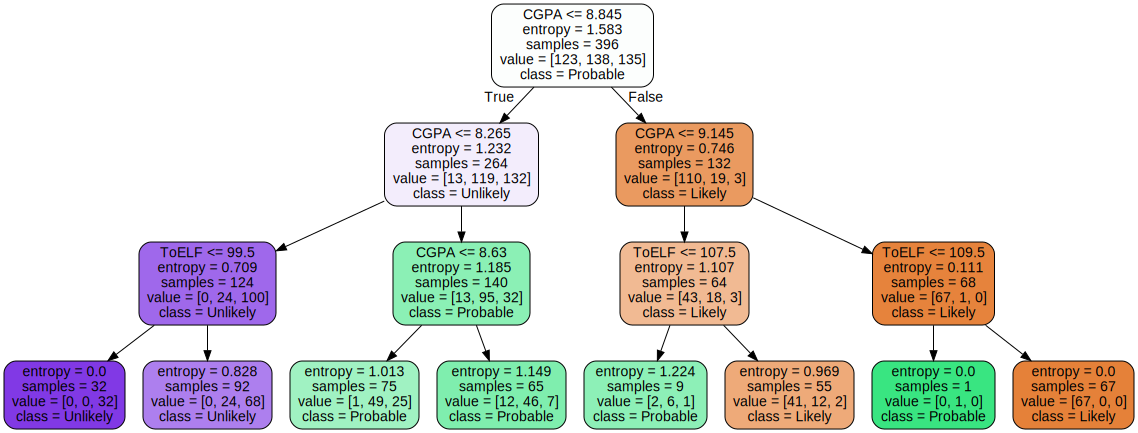

In [0]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names = ['GRE', 'ToELF', 'U_Rate', 'SOP', 'LOR', 'CGPA', 'Research'],
                                class_names = ['Likely', 'Probable', 'Unlikely'],
                                filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

## Create data to predict from and compare prediction

In [0]:
def outClassToCGPA(col, awry):
    print("%3s%5s%10s" % ("","CGPA", "Predicted"))
    print("____________________")
    for i in range(0, len(awry)):
        print("%d   %1.2f%10s" % (i,col[i],awry[i]))
    
createData = [[316, 109, 4, 4.0, 4.5, 8.60, 0, 'Probable'],
              [305, 108, 4, 3.0, 3.0, 8.25, 1, 'Unlikely'],
              [330, 115, 4, 4.5, 4.5, 9.18, 1, 'Likely']]

createData = pd.DataFrame(createData, columns=to_classify.columns)
testY = pd.DataFrame(createData, columns=['Class'])
testX = createData.drop(['Class'], axis=1)

predY = clf.predict(testX)
outClassToCGPA(createData.CGPA, predY)

    CGPA Predicted
____________________
0   8.60  Probable
1   8.25  Unlikely
2   9.18    Likely
